-- Jaimy Van Audenhove --

# Mushroom Classification

<b>The deadline for the notebook is 02/06/2023</b>.


<b>The deadline for the video is 09/06/2023</b>.

## The dataset

You are asked to predict whether a mushroom is poisonous or edibile, based on its physical characteristics. The dataset is provided in the accompanying file 'mushroom.csv'. A full description of the data set can be found in the file 'metadata.txt'.

The data set can be loaded using following commands (make sure to put the dataset in your iPython notebook directory):

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import warnings
import joblib
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#read and randomly shuffle data
mushroom = pd.read_csv('mushroom.csv', sep=';')

feature_cols = ['cap-diameter','cap-shape','cap-surface','cap-color','does-bruise-or-bleed','gill-attachment','gill-spacing','gill-color','stem-height','stem-width','stem-root','stem-surface','stem-color','veil-type','veil-color','has-ring','ring-type','spore-print-color','habitat','season']

#Create the feature and target vectors
X = mushroom[feature_cols]
y = mushroom['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

## Minimum Requirements

You will need to train at least 3 different models on the data set. Make sure to include the reason for your choice (e.g., for dealing with categorical features).

* Define the problem, analyze the data, prepare the data for your model.
* Train at least 3 models (e.g. decision trees, nearest neighbour, ...) to predict whether a mushroom is of poisonous or edible. You are allowed to use any machine learning model from scikit-learn or other methods, as long as you motivate your choice.
* For each model, optimize the model parameters settings (tree depth, hidden nodes/decay, number of neighbours,...). Show which parameter setting gives the best model.
* Compare the best parameter settings for both models and estimate their errors on unseen data. Investigate the learning process critically (overfitting/underfitting). Can you show that one of the models performs better?

All results, plots and code should be handed in as an interactive <a href='http://ipython.org/notebook.html'>iPython notebook</a>. Simply providing code and plots does not suffice, you are expected to accompany each technical section by explanations and discussions on your choices/results/observation/etc in the notebook and in a video (by recording your screen en voice). 

<b>The deadline for the notebook is 02/06/2023</b>.

<b>The deadline for the video is 09/06/2023</b>.

## Optional Extensions

You are encouraged to try and see if you can further improve on the models you obtained above. This is not necessary to obtain a good grade on the assignment, but any extensions on the minimum requirements will count for extra credit. Some suggested possibilities to extend your approach are:

* Build and host an API for your best performing model. You can create a API using pyhton frameworks such as FastAPI, Flask, ... You can host een API for free on Heroku, using your student credit on Azure, ...
* Try to combine multiple models. Ensemble and boosting methods try to combine the predictions of many, simple models. This typically works best with models that make different errors. Scikit-learn has some support for this, <a href="http://scikit-learn.org/stable/modules/ensemble.html">see here</a>. You can also try to combine the predictions of multiple models manually, i.e. train multiple models and average their predictions
* You can always investigate whether all features are necessary to produce a good model. Feel free to lookup additional resources and papers to find more information, see e.g <a href='https://scikit-learn.org/stable/modules/feature_selection.html'> here </a> for the feature selection module provided by scikit-learn library.

## Additional Remarks

* Depending on the model used, you may want to <a href='http://scikit-learn.org/stable/modules/preprocessing.html'>scale</a> or <a href='https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features'>encode</a> your (categorical) features X and/or outputs y
* Refer to the <a href='http://scipy.org/docs.html'>SciPy</a> and <a href='http://scikit-learn.org/stable/documentation.html'>Scikit learn</a> documentations for more information on classifiers and data handling.
* You are allowed to use additional libraries, but provide references for these.
* The assignment is **individual**. All results should be your own. Plagiarism will not be tolerated.

## First we will inspect the data to see what we're working with

**To start off we will check out the head and tail of the dataset**

In [2]:
mushroom.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [3]:
mushroom.tail()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61068,p,1.17,s,s,y,f,f,f,f,3.25,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


**Describing the data:**

In [4]:
mushroom.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [5]:
mushroom.describe(include='all')

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,61069,61069.000000,61069,46949,61069,61069,51185,36006,61069,61069.000000,...,9531,22945,61069,3177,7413,61069,58598,6354,61069,61069
unique,2,NaN,7,11,12,2,7,3,12,NaN,...,5,8,13,1,6,2,8,7,8,4
top,p,NaN,x,t,n,f,a,c,w,NaN,...,s,s,w,u,w,f,f,k,d,a
freq,33888,NaN,26934,8196,24218,50479,12698,24710,18521,NaN,...,3177,6025,22926,3177,5474,45890,48361,2118,44209,30177
mean,NaN,6.733854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.581538,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,5.264845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.370017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.380000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3.480000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.640000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,5.860000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.950000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,8.540000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.740000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Checking the % of missing values**

In [6]:
missing = pd.concat([mushroom.isnull().sum(), 100 * mushroom.isnull().mean()], axis = 1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
class,0,0.000000
has-ring,0,0.000000
stem-color,0,0.000000
habitat,0,0.000000
stem-height,0,0.000000
gill-color,0,0.000000
stem-width,0,0.000000
does-bruise-or-bleed,0,0.000000
cap-color,0,0.000000
cap-shape,0,0.000000


**Here we can see that ~95% of the 'veil-type' is missing, so we will just drop it due to not having a lot of data**

In [7]:
# Drop veil-type since there is only ~5% of data for it
mushroom.drop('veil-type', axis=1,inplace=True)

In [8]:
# Fill in the empty values with 'unknown'
mushroom = mushroom.fillna(value='unknown')

Checking if the values are now filled in (by adding up all the null values)

In [9]:
mushroom.isnull().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64

In [10]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           61069 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       61069 non-null  object 
 7   gill-spacing          61069 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             61069 non-null  object 
 12  stem-surface          61069 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-color            61069 non-null  object 
 15  has-ring           

**Cutting up the columns that have a float64 datatype in 4 quartiles to make them categories**

In [11]:
mushroom['cap-diameter'] = pd.qcut(mushroom['cap-diameter'],4,['1stQ','2ndQ','3rdQ','4thQ'])

In [12]:
mushroom['stem-width'] = pd.qcut(mushroom['stem-width'],4,['1stQ','2ndQ','3rdQ','4thQ'])

In [13]:
mushroom['stem-height'] = pd.qcut(mushroom['stem-height'],4,['1stQ','2ndQ','3rdQ','4thQ'])

In [14]:
#rename target column 'class' to 'poisonous'
mushroom.rename(columns={'class':'poisonous'},inplace=True)

In [15]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   poisonous             61069 non-null  object  
 1   cap-diameter          61069 non-null  category
 2   cap-shape             61069 non-null  object  
 3   cap-surface           61069 non-null  object  
 4   cap-color             61069 non-null  object  
 5   does-bruise-or-bleed  61069 non-null  object  
 6   gill-attachment       61069 non-null  object  
 7   gill-spacing          61069 non-null  object  
 8   gill-color            61069 non-null  object  
 9   stem-height           61069 non-null  category
 10  stem-width            61069 non-null  category
 11  stem-root             61069 non-null  object  
 12  stem-surface          61069 non-null  object  
 13  stem-color            61069 non-null  object  
 14  veil-color            61069 non-null  object  
 15  ha

We can see that the datatypes are now category instead of float64. We also changed the 'class' column to 'poisonous'

In [16]:
# Encode the data so we have numeric data
label_encoder = LabelEncoder()
for column in mushroom.columns:
    mushroom[column] = label_encoder.fit_transform(mushroom[column])

In [17]:
# Let's check out the new numeric data
mushroom.head(10)

,poisonous,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1,3,6,2,6,0,2,3,10,3,3,4,8,11,5,1,2,6,0,3
1,1,3,6,2,6,0,2,3,10,3,3,4,8,11,5,1,2,6,0,2
2,1,3,6,2,6,0,2,3,10,3,3,4,8,11,5,1,2,6,0,3
3,1,3,2,3,1,0,2,3,10,3,2,4,8,11,5,1,5,6,0,3
4,1,3,6,3,6,0,2,3,10,3,3,4,8,11,5,1,5,6,0,3
5,1,3,6,2,6,0,2,3,10,3,3,4,8,11,5,1,5,6,0,2
6,1,3,2,3,6,0,2,3,10,3,3,4,8,11,5,1,2,6,0,3
7,1,3,6,3,1,0,2,3,10,3,3,4,8,11,5,1,5,6,0,2
8,1,3,2,2,6,0,2,3,10,3,3,4,8,11,5,1,5,6,0,0
9,1,3,2,2,1,0,2,3,10,3,3,4,8,11,5,1,5,6,0,3


In [18]:
# Split the data into train and test sets with the new target class name
X = mushroom.drop('poisonous', axis=1)
y = mushroom['poisonous']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

**Here we will take a look at the correlation between poisonous mushrooms and the features to find out which are more likely to cause a poisonous vs an edible mushroom**

In [19]:
corr = mushroom.corr()

In [20]:
corr["poisonous"].sort_values(ascending=False)

poisonous               1.000000
has-ring                0.057559
ring-type               0.054271
cap-color               0.026411
gill-spacing           -0.004267
stem-root              -0.010759
gill-attachment        -0.013578
does-bruise-or-bleed   -0.019889
cap-surface            -0.031689
habitat                -0.041923
season                 -0.054046
gill-color             -0.060701
stem-color             -0.094772
cap-shape              -0.106309
stem-height            -0.122178
spore-print-color      -0.127431
veil-color             -0.143016
stem-surface           -0.160457
cap-diameter           -0.200295
stem-width             -0.232316
Name: poisonous, dtype: float64

Here we can see that 'stem-width' has the highest negative correlation, indicating that as the stem width increases, the likelihood of the mushroom being poisonous decreases. Similarly, 'cap-diameter' also has a relatively strong negative correlation.

On the other hand, 'has-ring', 'ring-type' and 'cap-color' appear more likely to be poisonous mushrooms as their values inscrease, since they have a positive correlation to 'poisonous'.


**Below we will check out the correlations to 'stem-width' and go a bit more in-depth**

In [21]:
mushroom[["stem-width", "poisonous"]].groupby(["stem-width"], as_index=False).mean().sort_values(by="poisonous", ascending=False)

,stem-width,poisonous
0,0,0.716838
1,1,0.601454
2,2,0.491905
3,3,0.409162


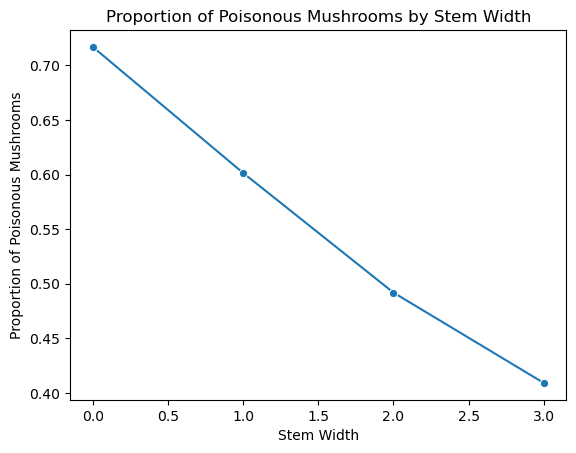

In [22]:
# Group the data by "stem-width" and calculate the mean of "poisonous"
grouped_data = mushroom[["stem-width", "poisonous"]].groupby(["stem-width"], as_index=False).mean()

# Plot the relationship
sns.lineplot(x="stem-width", y="poisonous", data=grouped_data, marker='o')

# Add labels and title
plt.xlabel("Stem Width")
plt.ylabel("Proportion of Poisonous Mushrooms")
plt.title("Proportion of Poisonous Mushrooms by Stem Width")
plt.show()

The data and plot again suggest a trend where mushrooms with a larger "stem-width" are less likely to be classified as poisonous.

**Let's now see if 'stem-width has any correlations to other features**

In [23]:
corr["stem-width"].sort_values(ascending=False)

stem-width              1.000000
cap-diameter            0.815118
stem-height             0.453254
does-bruise-or-bleed    0.297058
cap-shape               0.202074
stem-surface            0.190597
stem-color              0.145319
gill-color              0.129927
spore-print-color       0.124787
has-ring                0.110441
gill-attachment         0.093598
cap-surface             0.087502
gill-spacing            0.076876
veil-color              0.066258
ring-type               0.063242
cap-color               0.017451
season                 -0.020975
stem-root              -0.124272
habitat                -0.130520
poisonous              -0.232316
Name: stem-width, dtype: float64

Based on the positive correlation values between 'cap-diameter', 'stem-height', and 'stem-width', it suggests that as the 'cap-diameter' and 'stem-height' increase, there is a tendency for the 'stem-width' to also increase. 

This in combination with knowing that the stem-width' has the highest negative correlation to a mushroom being poisonous possibly means that larger mushrooms, as indicated by higher values of 'cap-diameter', 'stem-height' and 'stem-width', are more likely to be edible. 

# Models:

## Desicion Tree Classifier:
I chose the Decision Tree Classifier model because it provides feature importance and because it can handle categorical features. Decision trees can also be used effectively with large datasets like our mushroom dataset.

## Random Forest Classifier:
Like the Decision Tree Classifier, the Random Forest Classifier can also handle categorical features and provide feature importance. It also Handles high-dimensional data effectively and performs well on various types of datasets, so this is why it was ideal for our dataset.


## K- Nearest Neighbors:
KNN is a simple and intuitive algorithm. In the case of the mushroom dataset, where the edibility of mushrooms is determined by certain characteristics, using KNN can capture the similarity between mushrooms based on their feature values.

In [24]:
# Train the Models
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train, y_train)

modelRF = DecisionTreeClassifier()
modelRF.fit(X_train, y_train)

modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)

KNeighborsClassifier()

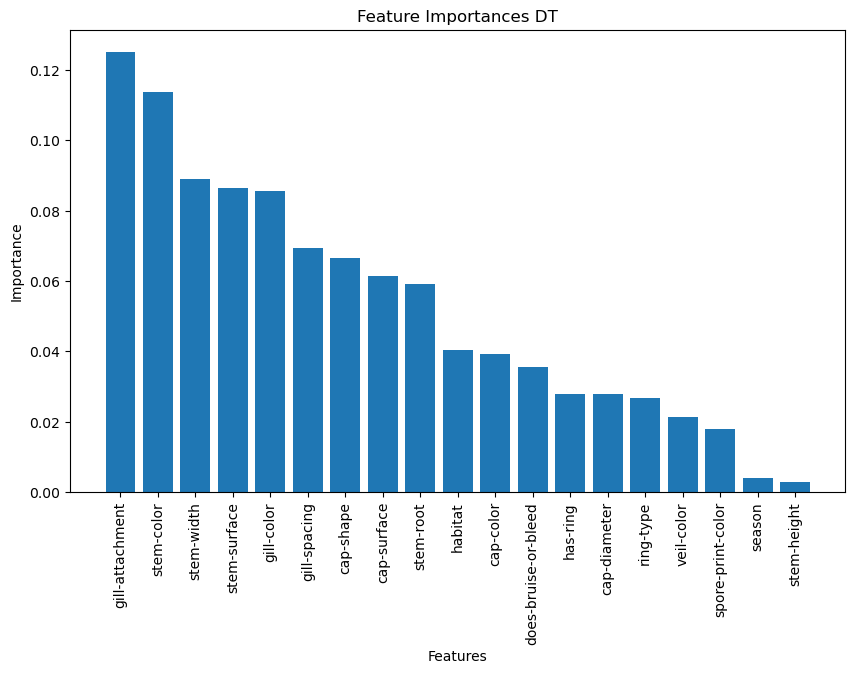

In [25]:
# Compute feature importances for Decision tree
importances = modelDT.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]

# Get the names of the features in the same order
feature_names = X_train.columns[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=feature_names)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances DT')
plt.show()


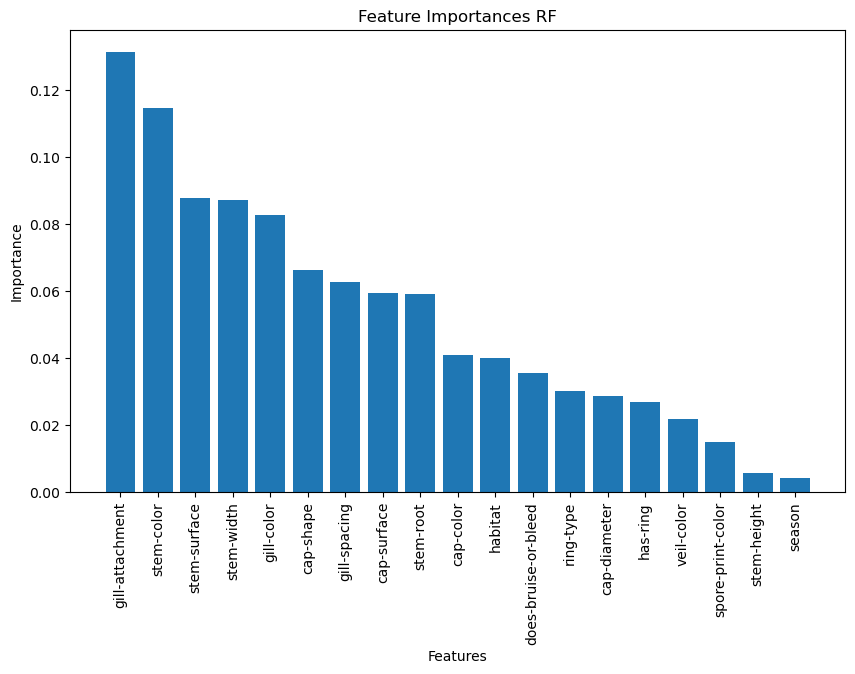

In [26]:
# Compute feature importances for Random Forest
importances = modelRF.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]

# Get the names of the features in the same order
feature_names = X_train.columns[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=feature_names)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances RF')
plt.show()

Since this 'season' has a relatively low importance value we will drop it. 'stem-height' is also ranked pretty low but we'll keep it since it had a correlation to 'stem-width'

In [27]:
mushroom.drop('season', axis=1,inplace=True)

In [28]:
# Standardize features by removing the mean and scaling to unit variance.
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1.341950,0.915714,-1.305813,-0.045582,-0.458029,-0.473068,1.113142,0.835268,1.341919,1.342184,-0.432597,1.031322,0.798799,1.851089,1.738751,0.140992,0.271064,-0.492721,1.768817
1,1.341950,0.915714,-1.305813,-0.045582,-0.458029,-0.473068,1.113142,0.835268,1.341919,1.342184,-0.432597,1.031322,0.798799,1.851089,1.738751,0.140992,0.271064,-0.492721,0.860194
2,1.341950,0.915714,-1.305813,-0.045582,-0.458029,-0.473068,1.113142,0.835268,1.341919,1.342184,-0.432597,1.031322,0.798799,1.851089,1.738751,0.140992,0.271064,-0.492721,1.768817
3,1.341950,-0.954657,-1.011398,-1.622346,-0.458029,-0.473068,1.113142,0.835268,1.341919,0.447810,-0.432597,1.031322,0.798799,1.851089,1.738751,1.692942,0.271064,-0.492721,1.768817
4,1.341950,0.915714,-1.011398,-0.045582,-0.458029,-0.473068,1.113142,0.835268,1.341919,1.342184,-0.432597,1.031322,0.798799,1.851089,1.738751,1.692942,0.271064,-0.492721,1.768817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,-1.341525,0.448122,0.166263,1.531183,-0.458029,-0.079656,0.383697,-1.675402,-1.338890,-0.446565,0.363565,0.478015,1.109504,-0.107165,-0.575125,-0.376325,0.271064,-0.492721,-0.957054
61065,-1.341525,-0.954657,0.166263,1.531183,-0.458029,-0.079656,0.383697,-1.675402,-1.338890,-0.446565,0.363565,0.478015,1.109504,-0.107165,-0.575125,-0.376325,0.271064,-0.492721,-0.957054
61066,-1.341525,0.448122,0.166263,1.531183,-0.458029,-0.079656,0.383697,-1.675402,-1.338890,-0.446565,0.363565,0.478015,1.109504,-0.107165,-0.575125,-0.376325,0.271064,-0.492721,0.860194
61067,-1.341525,-0.954657,0.166263,1.531183,-0.458029,-0.079656,0.383697,-1.675402,-1.338890,-0.446565,0.363565,0.478015,1.109504,-0.107165,-0.575125,-0.376325,0.271064,-0.492721,0.860194


**For each model we will perform 5-fold cross-validation and check the scores as well as calculate the mean**

**We will also check out the accuracy scores and compare the train and test data against each other by comparing the training and validation accuracy**

# Model 1: Decision tree

In [29]:
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train, y_train)

# Cross validation
scoreDT = cross_val_score(modelDT, X_train, y_train, cv=5)
print("Cross-Validation Accuracy Scores:", scoreDT)
print("Mean Accuracy:", scoreDT.mean())

# Training vs Test data
decision_tree_Taccuracy = accuracy_score(y_train, modelDT.predict(X_train))*100
decision_tree_accuracy = accuracy_score(y_test, modelDT.predict(X_test))*100
print('Training Accuracy : ', decision_tree_Taccuracy)
print('Validation Accuracy : ', decision_tree_accuracy)

# Precision, Recall and F1 score
y_pred = modelDT.predict(X_test)
precisionDT = precision_score(y_test, y_pred)
recallDT = recall_score(y_test, y_pred)
f1DT = f1_score(y_test, y_pred)

print("\nPrecision Score:", precisionDT)
print("Recall Score:", recallDT)
print("F1-score:", f1DT)

Cross-Validation Accuracy Scores: [0.99928359 0.99928359 0.99948828 0.99907891 0.99948828]
Mean Accuracy: 0.9993245317777095
Training Accuracy :  100.0
Validation Accuracy :  99.97543802194203

Precision Score: 0.9997076450811285
Recall Score: 0.9998538011695907
F1-score: 0.9997807177837877


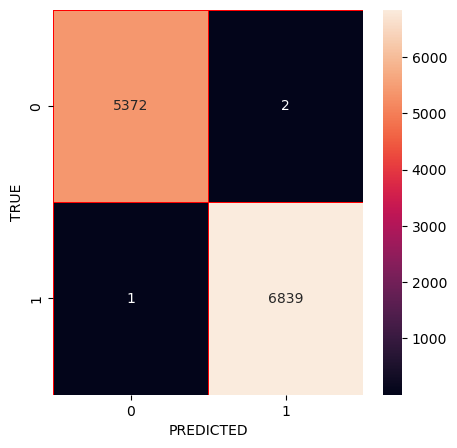

In [30]:
# Plotting a heatmap for the results
y_pred = modelDT.predict(X_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("PREDICTED")
plt.ylabel("TRUE")
plt.show()

# Model 2: Random Forest

In [31]:
modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
# Cross validation
scoreRF = cross_val_score(modelRF, X_train, y_train, cv=5)
print("Cross-Validation Accuracy Scores:", scoreRF)
print("Mean Accuracy:", scoreRF.mean())

# Training vs Test data
random_forest_Taccuracy = accuracy_score(y_train, modelRF.predict(X_train))*100
random_forest_accuracy = accuracy_score(y_test, modelRF.predict(X_test))*100
print('Training Accuracy : ',  random_forest_accuracy)
print('Validation Accuracy : ', random_forest_accuracy)

# Precision, Recall and F1 score
y_pred = modelRF.predict(X_test)
precisionRF = precision_score(y_test, y_pred)
recallRF = recall_score(y_test, y_pred)
f1RF = f1_score(y_test, y_pred)

print("\nPrecision Score:", precisionRF)
print("Recall Score:", recallRF)
print("F1-score:", f1RF)

Cross-Validation Accuracy Scores: [1.         0.99989766 0.99979531 0.99989766 0.99989766]
Mean Accuracy: 0.9998976563299561
Training Accuracy :  100.0
Validation Accuracy :  100.0

Precision Score: 1.0
Recall Score: 1.0
F1-score: 1.0


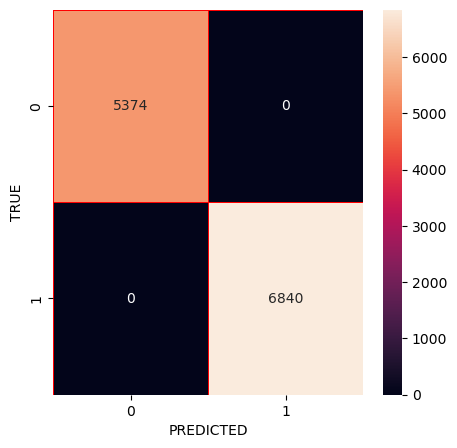

In [33]:
# Plotting a heatmap for the results
y_pred = modelRF.predict(X_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("PREDICTED")
plt.ylabel("TRUE")
plt.show()

# Model 3: K-Nearest Neighbors

In [34]:
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
warnings.filterwarnings("ignore", category=FutureWarning, module="scipy")

modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)

# Rest of the code...


modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)

# Cross validation
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    scoreKNN = cross_val_score(modelKNN, X_train, y_train, cv=5)
    print("Cross-Validation Accuracy Scores:", scoreKNN)
    print("Mean Accuracy:", scoreKNN.mean())

# Training vs Test data
KNN_Taccuracy = accuracy_score(y_train, modelKNN.predict(X_train))*100
KNN_accuracy = accuracy_score(y_test, modelKNN.predict(X_test))*100 
print('Training Accuracy : ', KNN_Taccuracy)
print('Validation Accuracy : ', KNN_accuracy)

# Precision, Recall, and F1 score
y_pred = modelKNN.predict(X_test)
precisionKNN = precision_score(y_test, y_pred)
recallKNN = recall_score(y_test, y_pred)
f1KNN = f1_score(y_test, y_pred)

print("\nPrecision Score:", precisionKNN)
print("Recall Score:", recallKNN)
print("F1-score:", f1KNN)


Cross-Validation Accuracy Scores: [0.99866953 0.99897656 0.99856719 0.99826016 0.99877188]
Mean Accuracy: 0.998649063555419
Training Accuracy :  99.9590625319824
Validation Accuracy :  99.94268871786474

Precision Score: 0.9994152901622569
Recall Score: 0.999561403508772
F1-score: 0.9994883414955047


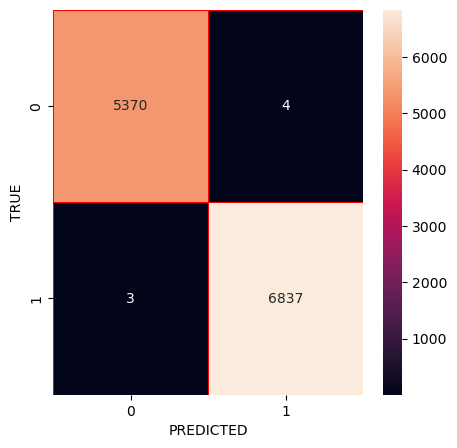

In [35]:
# Plotting a heatmap for the results
warnings.filterwarnings("ignore", category=FutureWarning)
y_pred = modelKNN.predict(X_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("PREDICTED")
plt.ylabel("TRUE")
plt.show()

**Heatmap of the correlation:**

<AxesSubplot:>

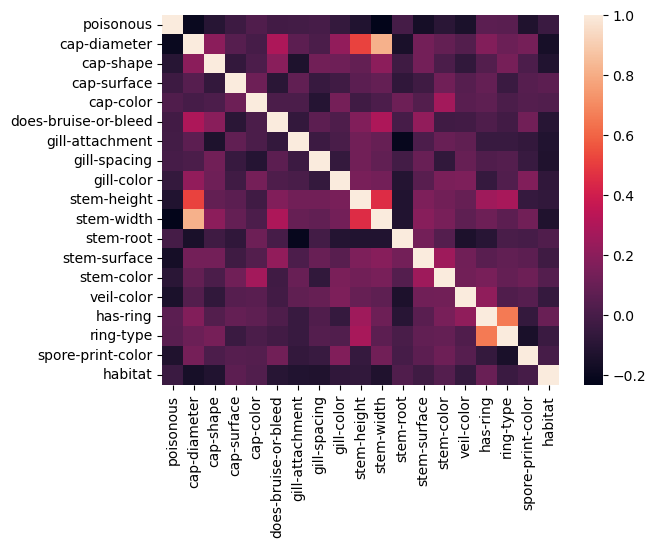

In [36]:
corr = mushroom.corr()
sns.heatmap(corr)

In this heatmap we can see that there is no single feature that has a perfect negative correlation. The high accuracy scores in the models appear to be a combination of all the features working together.

# Conclusion
### Compare the best parameter settings

In [37]:
# Compare the accuracy results
Aresults = {
    'Decision Tree': decision_tree_accuracy,
    'Random Forest': random_forest_accuracy,
    'K-Nearest Neighbors': KNN_accuracy
}

best_Amodel = max(Aresults, key=Aresults.get)
best_Aaccuracy = Aresults[best_Amodel]

print(f'Accuracy conclusion:')
print(f'The model with the highest accuracy is {best_Amodel} with an accuracy of {best_Aaccuracy:.4f}.\n')

# Compare the cross-validation results
Cresults = {
    'Decision Tree': scoreDT.mean(),
    'Random Forest': scoreRF.mean(),
    'K-Nearest Neighbors': scoreKNN.mean()
}

best_Cmodel = max(Cresults, key=Cresults.get)
best_Caccuracy = Cresults[best_Cmodel]

print('Cross-validation conclusion:')
print(f'The model with the highest cross-validation Accuracy is {best_Cmodel} with a mean accuracy of {best_Caccuracy:.4f}.\n')

# Compare the F1 score results
F1results = {
    'Decision Tree': f1DT,
    'Random Forest': f1RF,
    'K-Nearest Neighbors': f1KNN
}

best_F1model = max(F1results, key=F1results.get)
best_F1score = F1results[best_F1model]

print('Cross-validation conclusion:')
print(f'The model with the best F1 score is {best_F1model} with a score of {best_F1score:.4f}.')

Accuracy conclusion:
The model with the highest accuracy is Random Forest with an accuracy of 100.0000.

Cross-validation conclusion:
The model with the highest cross-validation Accuracy is Random Forest with a mean accuracy of 0.9999.

Cross-validation conclusion:
The model with the best F1 score is Random Forest with a score of 1.0000.


**Without a doubt we can see that Random Forest is the clear winner here!**

The Random forest model can correctly identify all mushrooms in the train and test data.

The highest cross-validation accuracy shows that Random Forest consistently performs well across different subsets of the data.

The F1 score is also the highest for Random Forest. This shows that the model achieves a good balance between correctly identifying positive samples (precision) and capturing all positive samples (recall). 

Overall, Random Forest has the best performance across accuracy, cross-validation, and F1 score, making it the clear winner for the given mushroom dataset.

# Extra: API for Random Forest Model

In [38]:
#Dumping the model pkl file

joblib.dump(modelRF, './RandomForestModel.pkl')

['./RandomForestModel.pkl']

**The API is hosted on Azure at https://mushroomsai.azurewebsites.net/predict**

**All the code is available on GitHub at https://github.com/JaimyVA/Mushroom-Classification**

In addition, the repository includes two test JSON files. One of these files contains data for an edible mushroom, while the other file contains data for a poisonous mushroom. This can be used to perform test requests on the API by sending the JSON bodies as part of a POST request.